In [ ]:
import cv2 as cv
import numpy as np
from scipy import stats

In [ ]:
miimagen=cv.imread("pajaro")

In [ ]:
!ls

sample_data


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving pajaro.webp to pajaro.webp


In [ ]:
!ls

pajaro.webp  sample_data


In [ ]:
imagen=cv.imread("pajaro.webp")

In [ ]:
print(imagen)

[[[146 101  65]
  [146 101  65]
  [144 102  65]
  ...
  [157 127 100]
  [163 120  79]
  [164 114  68]]

 [[146 101  65]
  [146 101  65]
  [144 102  65]
  ...
  [153 129 105]
  [162 124  89]
  [165 120  79]]

 [[146 101  65]
  [146 101  65]
  [144 102  65]
  ...
  [145 133 115]
  [156 131 103]
  [161 128  97]]

 ...

 [[194 117  27]
  [194 117  27]
  [194 117  27]
  ...
  [182 110  26]
  [182 110  26]
  [182 110  26]]

 [[194 117  27]
  [194 117  27]
  [194 117  27]
  ...
  [182 110  26]
  [182 110  26]
  [182 110  26]]

 [[194 117  27]
  [194 117  27]
  [194 117  27]
  ...
  [182 110  26]
  [182 110  26]
  [182 110  26]]]


In [ ]:
import matplotlib.pyplot as plt


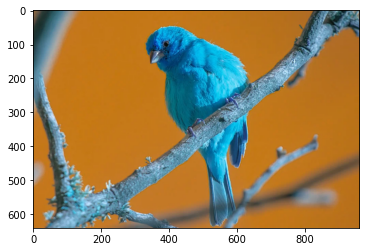

In [ ]:
plt.imshow(imagen)

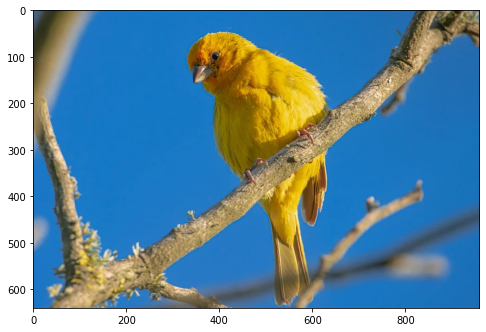

In [ ]:
imagen1=cv.cvtColor(imagen,cv.COLOR_BGR2RGB)
plt.figure(figsize=(8,9))
plt.imshow(imagen1)
plt.show()

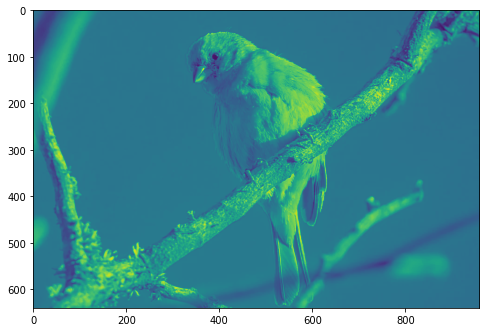

In [ ]:
imagen2=cv.cvtColor(imagen,cv.COLOR_BGR2GRAY)
plt.figure(figsize=(8,9))
plt.imshow(imagen2)
plt.show()

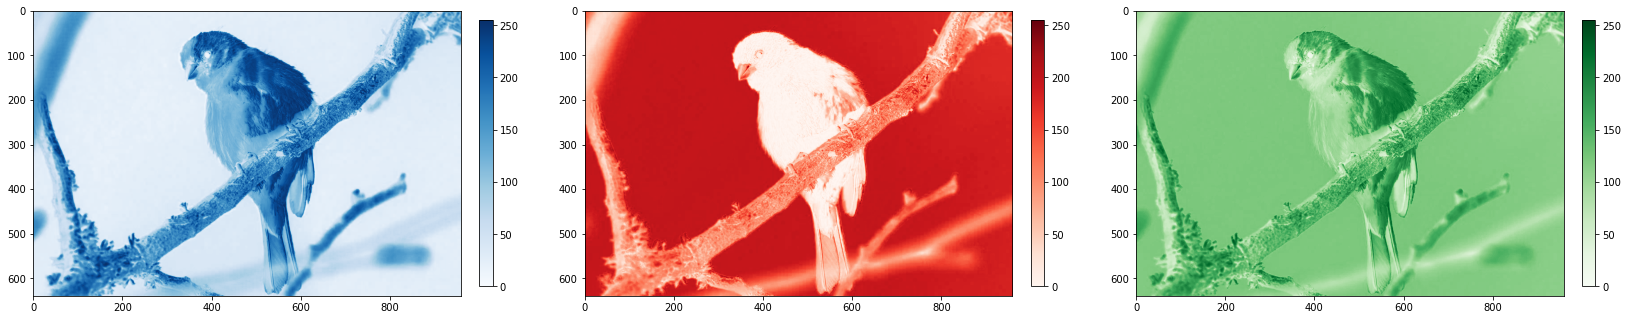

In [ ]:
r,g,b=cv.split(imagen)
plt.figure(figsize=(28,19))
plt.subplot(131)
im=plt.imshow(b,cmap="Blues")
plt.colorbar(im,fraction=0.029, pad=0.04)
plt.subplot(132)
im=plt.imshow(r,cmap="Reds")
plt.colorbar(im,fraction=0.029, pad=0.04)
plt.subplot(133)
im=plt.imshow(g,cmap="Greens")
plt.colorbar(im,fraction=0.029, pad=0.04)
plt.show()

Colores resultantes del código, ahora buscamos las gráficas de cada matrix de colores.

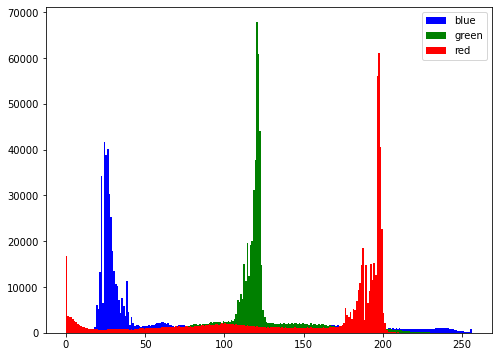

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(b.ravel(),bins=256,range=(0,256),color='b',label='blue')
plt.hist(g.ravel(),bins=256,range=(0,256),color='g',label='green')
plt.hist(r.ravel(),bins=256,range=(0,256),color='r',label='red')
plt.legend()
plt.show()

In [ ]:
print("la media de los colores verdes: ",np.mean(g))
print("la media de los colores rojos: ",np.mean(r))
print("la media de los colores azules: ",np.mean(b))
print("la mediana de los colores verdes: ",np.median(g))
print("la mediana de los colores rojos: ",np.median(r))
print("la mediana de los colores azules: ",np.median(b))

la media de los colores verdes:  122.17134928385417
la media de los colores rojos:  148.2342578125
la media de los colores azules:  74.38661946614583
la mediana de los colores verdes:  120.0
la mediana de los colores rojos:  186.0
la mediana de los colores azules:  34.0


In [ ]:
print("La Kurtosis es R",stats.kurtosis(r))
print("La Kurtosis es B",stats.kurtosis(b))
print("La Kurtosis es G",stats.kurtosis(g))
print("Coeficiente de simetria es ", stats.skew(r))
stats.mode(r)

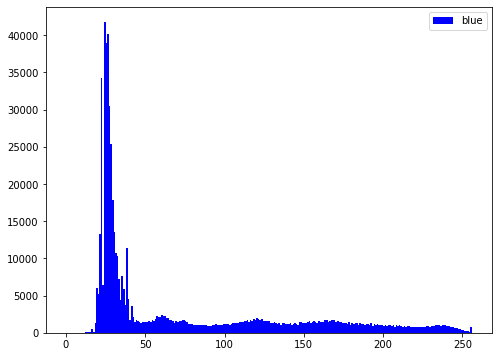

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(b.ravel(),bins=256,range=(0,256),color='b',label='blue')
plt.legend()
plt.show()

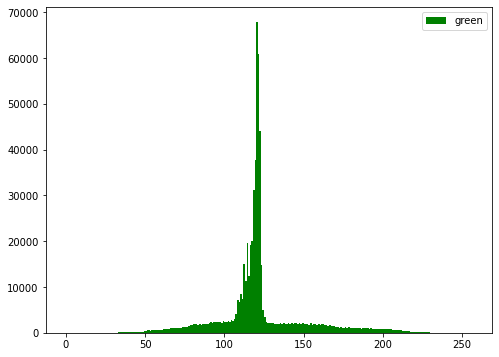

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(g.ravel(),bins=256,range=(0,256),color='g',label='green')
plt.legend()
plt.show()


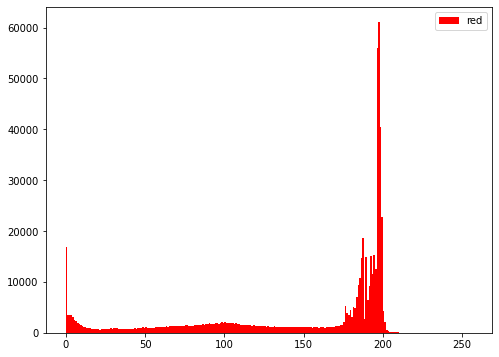

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(r.ravel(),bins=256,range=(0,256),color='r',label='red')
plt.legend()
plt.show()


In [ ]:
from scipy import stats

In [ ]:
imagenR=cv.cvtColor(imagen,cv.COLOR_BGR2RGBA)
imagenR=np.ravel(imagenR)
imagenR,len(imagenR),np.shape(imagenR),np.shape(imagenR)
rojoCLARO=imagenR[(imagenR>=170) & (imagenR<=255)]
rojoOSCURO=imagenR[(imagenR>=0) & (imagenR<85)]
rojoMEDIO=imagenR[(imagenR>=85) & (imagenR<170)]
len(rojoCLARO),len(rojoOSCURO),len(rojoMEDIO)

(1116998, 573521, 767081)

Se solicitó importar una imagen con la cual trabajamos para obtener la distribución de colores y sus rangos en la imagen, se toma la matrix de color y se le aplica las medidas de tendencia central, observando que estas tienden a mostrarse de manera multimodal, cada color presenta un comportamiento estadistico desde asimetrico hacia la izquierda, color azul; normal, color verde y asimetrica hacia la derecha, color rojo. Respecto a los grados de apuntamiento los resultados en las graficas son muy similares por la concentración de valores.
Tomando los valores de figura del color azul, se construye un nuevo arreglo de valores para obtener un histograma y una grafica de pastel, siendo el más acentuado el azul claro y el menor el azul oscuro, confirmado en la gra´fica de pastel.

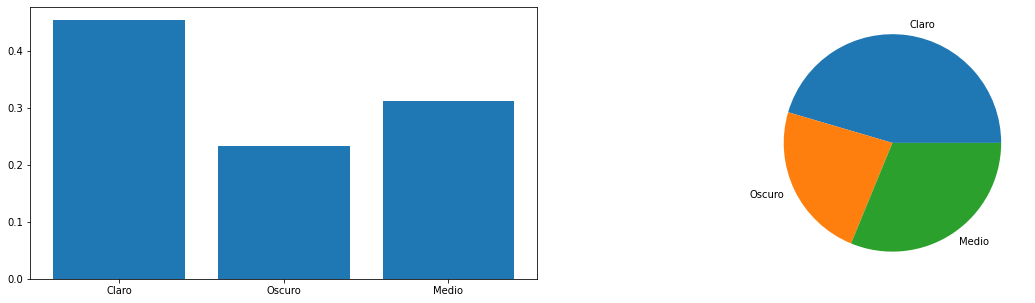

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(np.array(["Claro","Oscuro","Medio"]),np.array([len(rojoCLARO),len(rojoOSCURO),len(rojoMEDIO)])/len(imagenR))
plt.subplot(1,2,2)
plt.pie(np.array([len(rojoCLARO),len(rojoOSCURO),len(rojoMEDIO)])/len(imagenR), labels = np.array(["Claro","Oscuro","Medio"]))
plt.show()